val acc:0.13 | lr:0.00012311804749139173, weight decay:6.050874274200464e-08
val acc:0.07 | lr:1.6355275485832637e-05, weight decay:4.450401117914577e-06
val acc:0.2 | lr:2.980880466103006e-05, weight decay:7.434943456852995e-07
val acc:0.06 | lr:4.220479028530941e-06, weight decay:5.874935927714301e-06
val acc:0.11 | lr:8.782280597761874e-06, weight decay:9.183918434599368e-07
val acc:0.73 | lr:0.00670388494050126, weight decay:2.5620367864915188e-08
val acc:0.09 | lr:0.00012822730644117638, weight decay:2.7810230851613306e-07
val acc:0.15 | lr:3.7268147124921825e-06, weight decay:2.1217502914891594e-08
val acc:0.05 | lr:3.023615480284237e-06, weight decay:3.6392016688997335e-07
val acc:0.18 | lr:2.112062843626648e-05, weight decay:2.7266042998565106e-05
val acc:0.08 | lr:2.6636830735892117e-06, weight decay:4.644220885155666e-06
val acc:0.11 | lr:1.968828359366858e-05, weight decay:3.053805627588017e-05
val acc:0.06 | lr:7.246047859332307e-06, weight decay:3.3896212165257586e-07
val 

Best-13(val acc:0.34) | lr:0.0012475421631106432, weight decay:5.372407649952698e-07
Best-14(val acc:0.29) | lr:0.0013443959141701653, weight decay:8.556084731661616e-06
Best-15(val acc:0.28) | lr:0.0016147584635520097, weight decay:5.048552664189277e-06
Best-16(val acc:0.27) | lr:0.0013421385770043988, weight decay:2.7785176896481103e-08
Best-17(val acc:0.26) | lr:0.0012147077535975249, weight decay:1.2197417852674102e-06
Best-18(val acc:0.24) | lr:0.0015671744103566937, weight decay:1.4810665533201247e-07
Best-19(val acc:0.23) | lr:0.0008358987877213643, weight decay:1.17864394185242e-06
Best-20(val acc:0.22) | lr:0.0008236729197894124, weight decay:7.15894568120532e-06


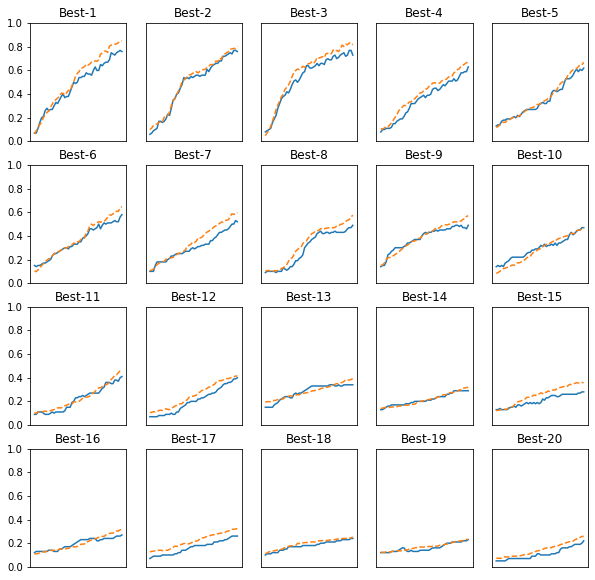

In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer
plt.rcParams["figure.figsize"] = (10,10)
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()